In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import gmaps
import scipy.stats as sts
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

#Google developer API key {Carlos}
from config import gkey

%matplotlib inline

In [4]:
#Load CSV
path = os.path.join('..','Resources','ATLCrime2016.csv')
crime = pd.read_csv(path)
crime.drop('Unnamed: 0', axis=1, inplace=True)
crime.head()

,crime,number,date,location,beat,neighborhood,npu,lat,long,Month,Day,Year
0,HOMICIDE,163051391092,10/31/2016,1205 METROPOLITAN AVE SE,612,East Atlanta,W,33.74173,-84.34749,10,31,2016
1,AUTO THEFT,163030548,10/31/2016,180 PONCE DE LEON AVE NE,505,Midtown,E,33.77285,-84.38149,10,31,2016
2,LARCENY-FROM VEHICLE,163041611,10/31/2016,1783 JOHNSON RD NW,110,Rockdale,G,33.78547,-84.44593,10,31,2016
3,LARCENY-FROM VEHICLE,163050183,10/31/2016,1000 NORTHSIDE DR NW,501,Home Park,E,33.78196,-84.40835,10,31,2016
4,AUTO THEFT,163050218,10/31/2016,2264 COUNTRY CLUB DR SW,409,Southwest,R,33.69384,-84.49398,10,31,2016


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crime         29131 non-null  object 
 1   number        29131 non-null  int64  
 2   date          29131 non-null  object 
 3   location      29131 non-null  object 
 4   beat          29131 non-null  int64  
 5   neighborhood  27795 non-null  object 
 6   npu           28877 non-null  object 
 7   lat           29131 non-null  float64
 8   long          29131 non-null  float64
 9   Month         29131 non-null  int64  
 10  Day           29131 non-null  int64  
 11  Year          29131 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.7+ MB


In [16]:
#Gmap pf Crime Type in 2016

#Configure Gmaps
gmaps.configure(api_key=gkey)

#Load parameters
coordg1 = crime.loc[(crime['crime']=='LARCENY-FROM VEHICLE') & (crime['Month']==6)][['lat','long']]
coordg2 = crime.loc[(crime['crime']=='BURGLARY-RESIDENCE') & (crime['Month']==6)][['lat','long']]
coordg3 = crime.loc[(crime['crime']=='ROBBERY-PEDESTRIAN') & (crime['Month']==6)][['lat','long']]
coordg4 = crime.loc[(crime['crime']=='RAPE') & (crime['Month']==6)][['lat','long']]
coordg5 = crime.loc[(crime['crime']=='HOMICIDE') & (crime['Month']==6)][['lat','long']]

figure_layout = {
    
    'width':'1000px',
    'height':'600px',
    'border':'1px solid black',
    'padding':'1px',
    'margin':'0 auto 0 auto'
}

f = gmaps.figure(layout=figure_layout)
#f.add_layer(gmaps.symbol_layer(coordg1, fill_color='red', stroke_color='red', scale=2))
#f.add_layer(gmaps.symbol_layer(coordg2, fill_color='green', stroke_color='green', scale=2))
f.add_layer(gmaps.symbol_layer(coordg3, fill_color='yellow', stroke_color='yellow', scale=2))
#f.add_layer(gmaps.symbol_layer(coordg4, fill_color='blue', stroke_color='blue', scale=2))
#f.add_layer(gmaps.symbol_layer(coordg5, fill_color='purple', stroke_color='purple', scale=2))
f

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

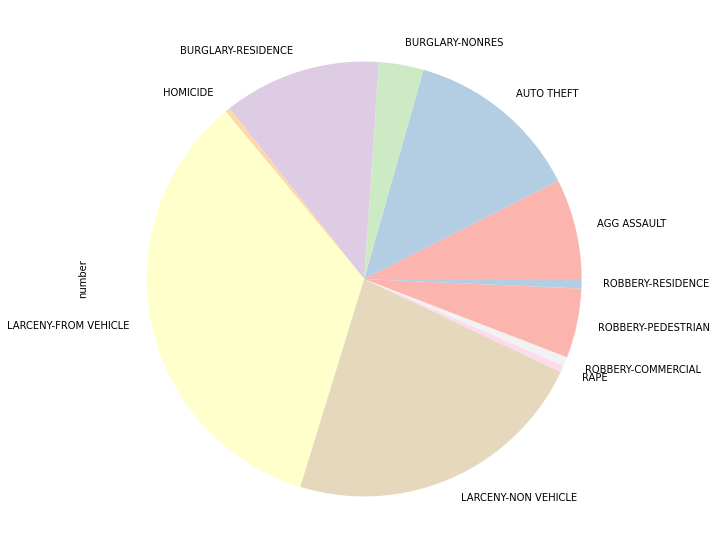

In [24]:
#Pie chart of type of crime
data = crime.groupby('crime').count().iloc[:,0]
labels=data.index
data.plot.pie(figsize=(10,10), labels=labels, colors = plt.get_cmap('Pastel1').colors)

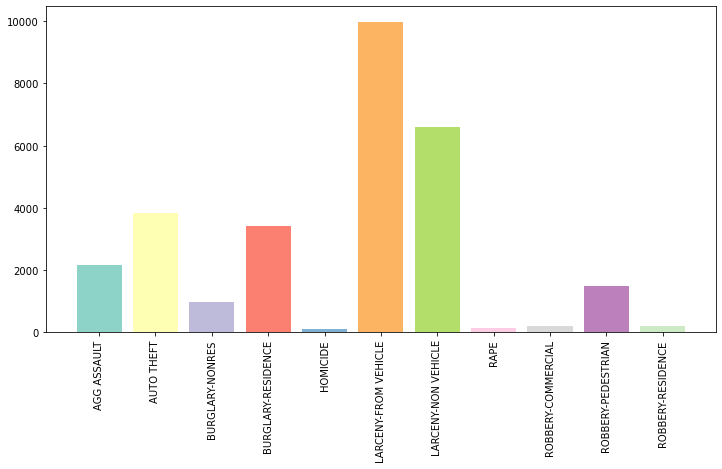

In [60]:
data = crime.groupby('crime').count().iloc[:,0].values
labels=crime.groupby('crime').count().iloc[:,0].index
x_axis = np.arange(len(data))

plt.figure(figsize=(12,6))
plt.bar(x_axis,data, color= plt.get_cmap('Set3').colors)
ticks= [v for v in x_axis]
plt.xticks(ticks,labels, rotation=90)
plt.show()

In [25]:
# Load individual groups
path = os.path.join('..','Resources','larceny.csv')
g1w = pd.read_csv(path)
g1w.drop('Unnamed: 0', axis=1, inplace=True)

path = os.path.join('..','Resources','burglary.csv')
g2w = pd.read_csv(path)
g2w.drop('Unnamed: 0', axis=1, inplace=True)

path = os.path.join('..','Resources','robbery.csv')
g3w = pd.read_csv(path)
g3w.drop('Unnamed: 0', axis=1, inplace=True)

path = os.path.join('..','Resources','rape.csv')
g4w = pd.read_csv(path)
g4w.drop('Unnamed: 0', axis=1, inplace=True)

path = os.path.join('..','Resources','homicide.csv')
g5w = pd.read_csv(path)
g5w.drop('Unnamed: 0', axis=1, inplace=True)


In [31]:
g1w

,Month,Day,Crime Count,Avg_Temp,Humidity,Precip,Wind_Speed,Conditions
0,1,1,21,42.8,67.84,0.00,13.3,Partially cloudy
1,1,2,28,40.0,58.12,0.00,13.8,Partially cloudy
2,1,3,24,42.2,54.95,0.00,12.7,Partially cloudy
3,1,4,29,38.5,53.05,0.00,16.7,Clear
4,1,5,27,34.6,44.61,0.00,12.6,Clear
...,...,...,...,...,...,...,...,...
361,12,27,22,62.2,86.62,0.01,12.6,"Rain, Overcast"
362,12,28,30,55.9,67.24,0.00,7.5,Partially cloudy
363,12,29,26,56.4,54.45,0.68,26.0,"Rain, Partially cloudy"
364,12,30,23,42.5,36.00,0.00,16.1,Clear


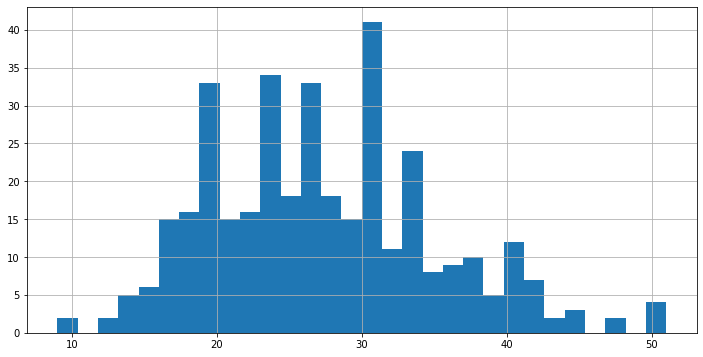

In [47]:
#For g1w Distribution
plt.figure(figsize=(12,6))
g1w['Crime Count'].hist(bins=30)
#g2w['Crime Count'].hist()
#g3w['Crime Count'].hist()
#g4w['Crime Count'].hist()
#g5w['Crime Count'].hist()

In [61]:
g1w

,Month,Day,Crime Count,Avg_Temp,Humidity,Precip,Wind_Speed,Conditions
0,1,1,21,42.8,67.84,0.00,13.3,Partially cloudy
1,1,2,28,40.0,58.12,0.00,13.8,Partially cloudy
2,1,3,24,42.2,54.95,0.00,12.7,Partially cloudy
3,1,4,29,38.5,53.05,0.00,16.7,Clear
4,1,5,27,34.6,44.61,0.00,12.6,Clear
...,...,...,...,...,...,...,...,...
361,12,27,22,62.2,86.62,0.01,12.6,"Rain, Overcast"
362,12,28,30,55.9,67.24,0.00,7.5,Partially cloudy
363,12,29,26,56.4,54.45,0.68,26.0,"Rain, Partially cloudy"
364,12,30,23,42.5,36.00,0.00,16.1,Clear


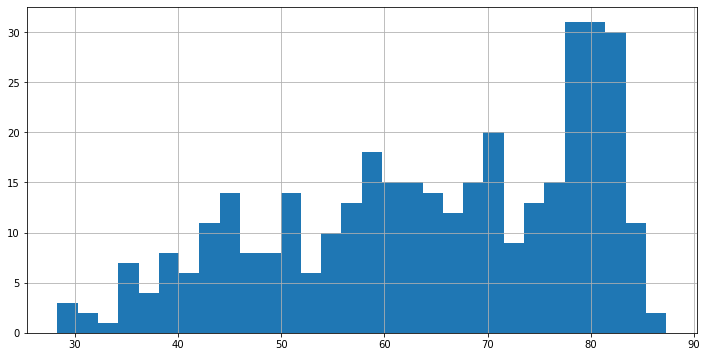

In [64]:
#Distplots for g1w per weather variable
plt.figure(figsize=(12,6))
g1w['Avg_Temp'].hist(bins=30)

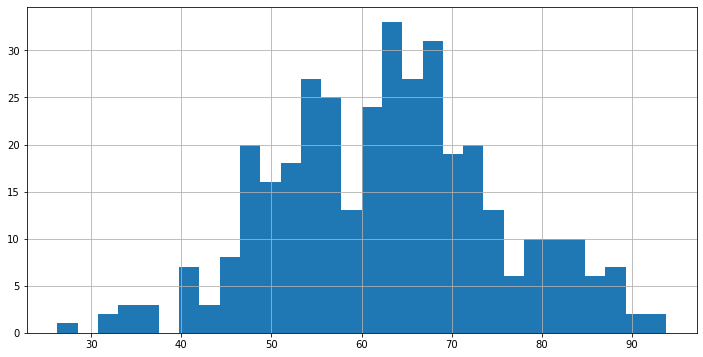

In [66]:
#Distplots for g1w per weather variable
plt.figure(figsize=(12,6))
g1w['Humidity'].hist(bins=30)

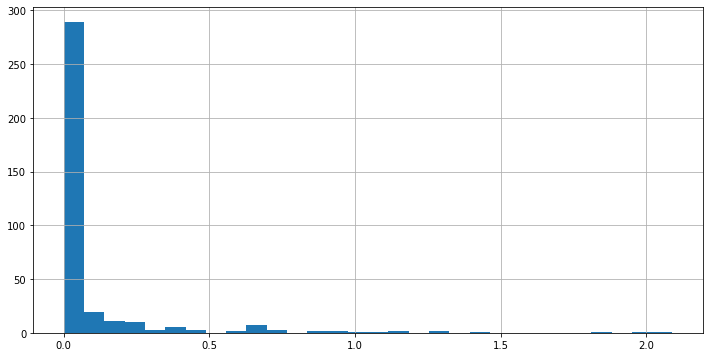

In [67]:
#Distplots for g1w per weather variable
plt.figure(figsize=(12,6))
g1w['Precip'].hist(bins=30)

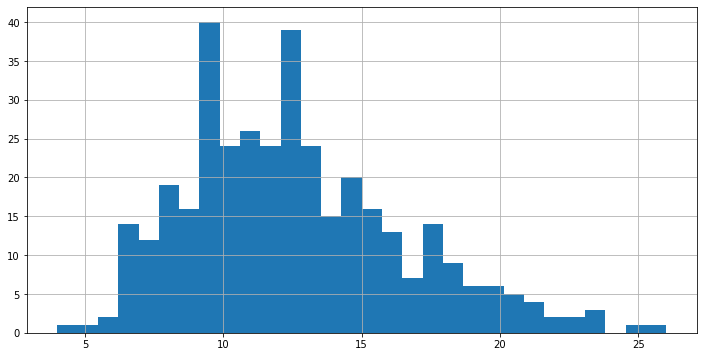

In [68]:
#Distplots for g1w per weather variable
plt.figure(figsize=(12,6))
g1w['Wind_Speed'].hist(bins=30)

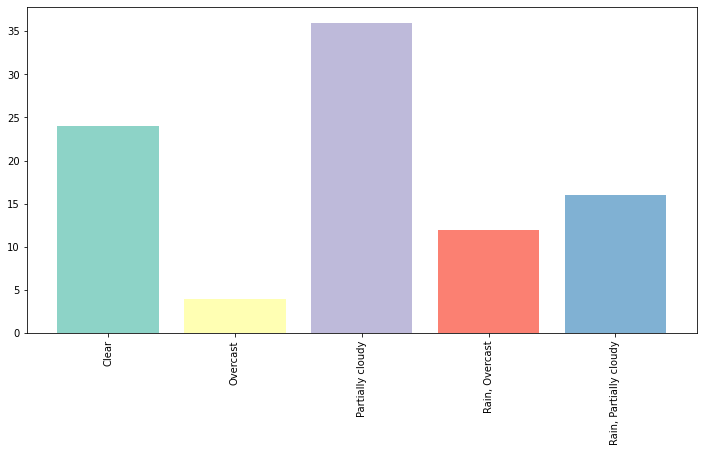

In [73]:
data = g5w.groupby('Conditions').count().iloc[:,0].values
labels=g5w.groupby('Conditions').count().iloc[:,0].index
x_axis = np.arange(len(data))

plt.figure(figsize=(12,6))
plt.bar(x_axis,data, color= plt.get_cmap('Set3').colors)
ticks= [v for v in x_axis]
plt.xticks(ticks,labels, rotation=90)
plt.show()

In [74]:
g1w

,Month,Day,Crime Count,Avg_Temp,Humidity,Precip,Wind_Speed,Conditions
0,1,1,21,42.8,67.84,0.00,13.3,Partially cloudy
1,1,2,28,40.0,58.12,0.00,13.8,Partially cloudy
2,1,3,24,42.2,54.95,0.00,12.7,Partially cloudy
3,1,4,29,38.5,53.05,0.00,16.7,Clear
4,1,5,27,34.6,44.61,0.00,12.6,Clear
...,...,...,...,...,...,...,...,...
361,12,27,22,62.2,86.62,0.01,12.6,"Rain, Overcast"
362,12,28,30,55.9,67.24,0.00,7.5,Partially cloudy
363,12,29,26,56.4,54.45,0.68,26.0,"Rain, Partially cloudy"
364,12,30,23,42.5,36.00,0.00,16.1,Clear


In [80]:
test = g1w.groupby('Month').mean()
test.reset_index(inplace=True)
test

,Month,Day,Crime Count,Avg_Temp,Humidity,Precip,Wind_Speed
0,1,16.0,23.064516,41.451613,62.945806,0.153871,13.254839
1,2,15.0,24.000000,47.448276,59.418621,0.220690,15.141379
2,3,16.0,22.193548,59.658065,60.669677,0.060645,13.941935
3,4,15.5,24.333333,63.403333,57.422667,0.117333,13.870000
4,5,16.0,26.451613,70.093548,61.676452,0.046774,13.219355
5,6,15.5,25.033333,79.673333,61.754000,0.112333,12.583333
6,7,16.0,26.870968,81.783871,67.598710,0.108387,12.077419
7,8,16.0,31.032258,81.006452,72.203548,0.093548,11.129032
8,9,15.5,35.100000,77.220000,65.500000,0.111333,9.730000
9,10,16.0,33.225806,67.241935,60.941935,0.004194,11.306452


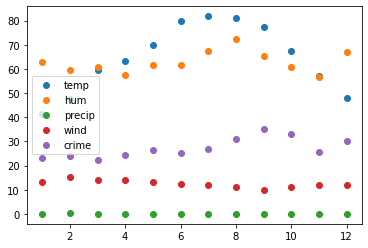

In [88]:
plt.scatter(test['Month'],test['Avg_Temp'], label='temp')
plt.scatter(test['Month'],test['Humidity'], label='hum')
plt.scatter(test['Month'],test['Precip'], label='precip')
plt.scatter(test['Month'],test['Wind_Speed'], label='wind')
plt.scatter(test['Month'],test['Crime Count'], label='crime')
plt.legend()

In [87]:
g1w

,Month,Day,Crime Count,Avg_Temp,Humidity,Precip,Wind_Speed,Conditions
0,1,1,21,42.8,67.84,0.00,13.3,Partially cloudy
1,1,2,28,40.0,58.12,0.00,13.8,Partially cloudy
2,1,3,24,42.2,54.95,0.00,12.7,Partially cloudy
3,1,4,29,38.5,53.05,0.00,16.7,Clear
4,1,5,27,34.6,44.61,0.00,12.6,Clear
...,...,...,...,...,...,...,...,...
361,12,27,22,62.2,86.62,0.01,12.6,"Rain, Overcast"
362,12,28,30,55.9,67.24,0.00,7.5,Partially cloudy
363,12,29,26,56.4,54.45,0.68,26.0,"Rain, Partially cloudy"
364,12,30,23,42.5,36.00,0.00,16.1,Clear


The correlation coeficient r is: -0.12476937685579438


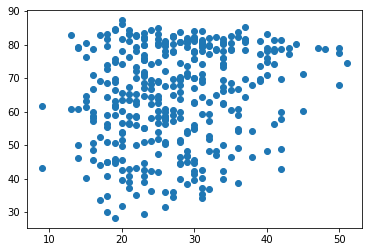

In [90]:
plt.scatter(g1w['Crime Count'],g1w['Avg_Temp'])
print("The correlation coeficient r is: "+str(sts.pearsonr(g1w['Crime Count'],g1w['Wind_Speed'])[0]))

The correlation coeficient r is: 0.10856448913289055


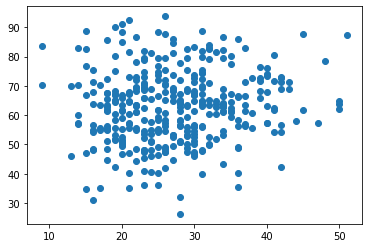

In [91]:
plt.scatter(g1w['Crime Count'],g1w['Humidity'])
print("The correlation coeficient r is: "+str(sts.pearsonr(g1w['Crime Count'],g1w['Humidity'])[0]))

The correlation coeficient r is: -0.06356737172401244


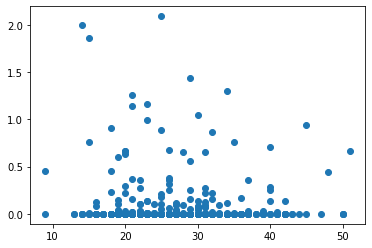

In [92]:
plt.scatter(g1w['Crime Count'],g1w['Precip'])
print("The correlation coeficient r is: "+str(sts.pearsonr(g1w['Crime Count'],g1w['Precip'])[0]))

The correlation coeficient r is: -0.12476937685579438


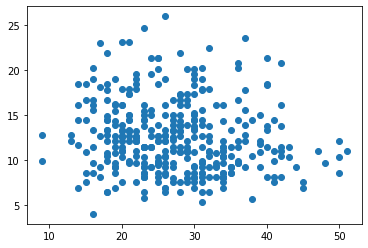

In [93]:
plt.scatter(g1w['Crime Count'],g1w['Wind_Speed'])
print("The correlation coeficient r is: "+str(sts.pearsonr(g1w['Crime Count'],g1w['Wind_Speed'])[0]))